In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from scipy.io.wavfile import read

from sklearn.tree import DecisionTreeClassifier

import warnings

In [6]:
def read_and_process_data(data_dir: str) -> tuple:
    
    ground, target, valid, samplerates = [], [], [], []

    for file in os.listdir(data_dir):
        samplerate, data = read(os.path.join(data_dir, file))

        ground.append(data[:20 * samplerate, 0])
        target.append(data[:20 * samplerate, 1])
        samplerates.append(samplerate)

        if "invalid" in file:
            valid.append(-1)
        else:
            valid.append(1) 
    
    return np.array(ground), np.array(target), np.array(valid), np.array(samplerates)

In [7]:
ground, target, valid, samplerates = read_and_process_data('data')

Text(0.5, 1.0, 'Valid Target')

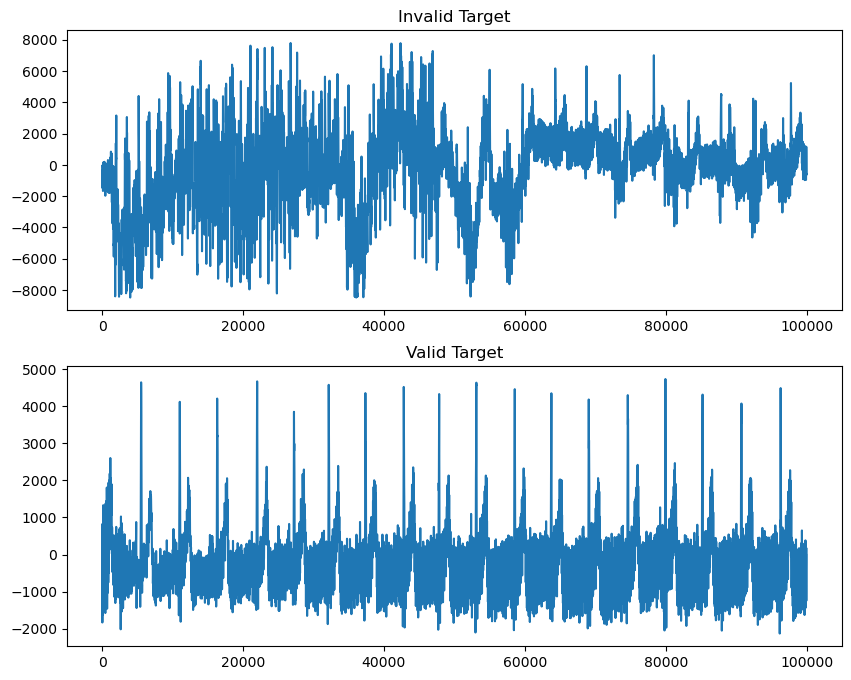

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
ax[0].plot(target[1])
ax[0].set_title("Invalid Target")

ax[1].plot(target[3])
ax[1].set_title("Valid Target")

In [23]:
def preprocess(data):
    return pd.DataFrame({"num_times_above_4000": np.sum(data > 4000, axis = 1),
                         "mean": np.mean(data, axis = 1),
                         "median": np.median(data, axis = 1)})

In [37]:
X = preprocess(target)
y = valid

In [38]:
tree = DecisionTreeClassifier()
tree.fit(X, y)
tree.predict_proba(X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [63]:
def demonstrate(index):
    warnings.filterwarnings("ignore", category = UserWarning)
    pred = "valid" if tree.predict(np.array(X)[index, :].reshape(1, -1)) == 1 else "invalid"
    truth = "valid" if valid[index] == 1 else "invalid"
    
    print(f"Predicted: {pred}")
    print(f"True: {truth}")

    plt.plot(target[index])

Predicted: valid
True: valid


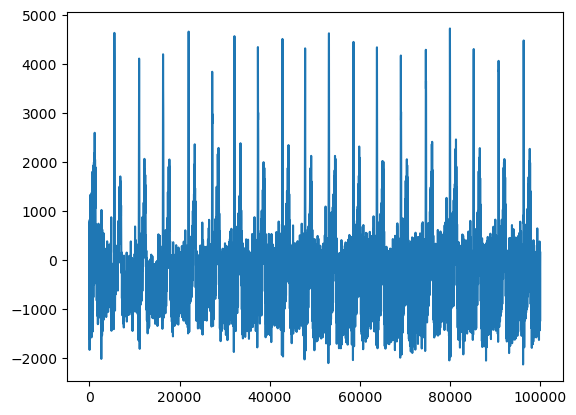

In [64]:
demonstrate(3)